In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


In [5]:
df = pd.read_csv('fake_reg.csv')


In [ ]:
df.head()


price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

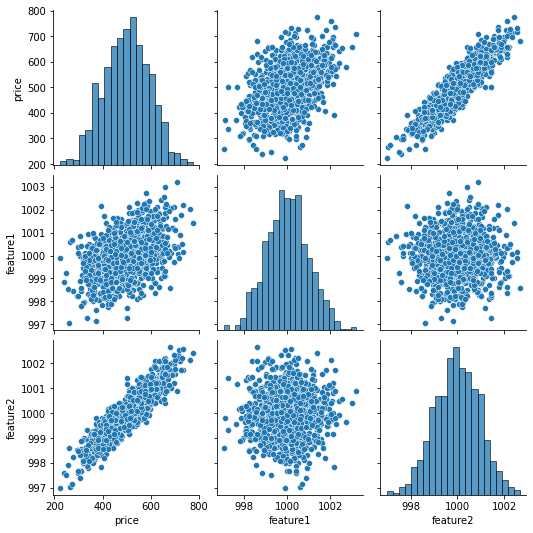

In [6]:
sns.pairplot(df)


In [7]:
from sklearn.model_selection import train_test_split


In [8]:
X = df[['feature1', 'feature2']].values
y = df['price'].values



In [9]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [10]:
y


array([461.52792939, 548.13001146, 410.29716167, 540.38221981,
       546.02455292, 542.9836716 , 555.48566416, 417.56972453,
       373.14653122, 633.35029248, 624.24709206, 475.37241721,
       600.36844486, 532.83295175, 472.8353628 , 506.31229096,
       508.414406  , 610.4553519 , 323.65776198, 446.21230389,
       362.12270299, 433.41064026, 562.00257647, 637.30962074,
       522.80800754, 469.8028243 , 543.10992778, 565.43416994,
       530.03285381, 610.58016503, 482.55641188, 327.56004052,
       579.73083872, 448.42981468, 628.97709187, 536.79737216,
       570.06729543, 357.82557519, 612.08492732, 444.67970846,
       600.1186364 , 523.53312776, 512.94994495, 614.8813169 ,
       404.35303251, 643.68851807, 488.95660398, 443.20468572,
       514.47906638, 514.88174058, 325.05852217, 554.6620585 ,
       451.39140001, 587.67887726, 477.73749721, 574.51560687,
       548.9107991 , 528.69088356, 443.21100482, 397.88209319,
       355.79535223, 460.69478138, 534.7673737 , 537.60

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [12]:
X_train.shape


(670, 2)

In [13]:
X_test.shape

(330, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
scaler = MinMaxScaler()


In [16]:
scaler.fit(X_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)


In [18]:
X_test =  scaler.transform(X_test)


In [19]:
X_train.min()


0.0

In [20]:
X_train.max()


1.0

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [22]:
model = Sequential([Dense(65, activation='relu'),
                    Dense(60, activation='relu' ),
                    Dense(55, activation='relu'), 
                    Dense(50, activation='relu'),
                    Dense(45, activation='relu'),
                    Dense(40, activation='relu'),
                    Dense(35, activation='relu'),
                    Dense(30, activation='relu'),
                    Dense(25, activation='relu'),
                    Dense(20, activation='relu'),
                    Dense(15, activation='relu'),\
                    Dense(10, activation='relu'),
                    Dense(5, activation='relu'),
                    Dense(1)])

model.compile(optimizer='rmsprop', loss='mse')






In [23]:
model.fit(x=X_train, y=y_train, epochs=250)


Epoch 1/250
21/21 [==============================] - 2s 2ms/step - loss: 256820.9652
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 156834.6129
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 822.3330
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 1916.1230
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 1430.3683
Epoch 6/250
21/21 [==============================] - 0s 2ms/step - loss: 1628.6647
Epoch 7/250
21/21 [==============================] - 0s 2ms/step - loss: 1232.2945
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 910.1575
Epoch 9/250
21/21 [==============================] - 0s 2ms/step - loss: 1232.1081
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 911.3060
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 1012.7745
Epoch 12/250
21/21 [==============================] - 0s 2ms/step - loss: 962.0769
E

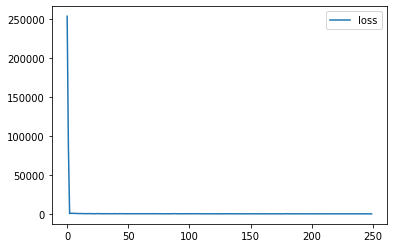

In [24]:
 loss_df = pd.DataFrame(model.history.history)
 loss_df.plot()


In [25]:
model.evaluate(X_test, y_test, verbose=0)


892.2429809570312

In [26]:
model.evaluate(X_train, y_train, verbose=0)


868.435546875

In [27]:
!pip install h5py pyyaml


In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 65)                195       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3960      
_________________________________________________________________
dense_2 (Dense)              (None, 55)                3355      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2800      
_________________________________________________________________
dense_4 (Dense)              (None, 45)                2295      
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1840      
_________________________________________________________________
dense_6 (Dense)              (None, 35)                1

In [29]:
model.save('basic_deep_regression.h5')


In [31]:
from keras.models import load_model
new_model = load_model('basic_deep_regression.h5')


In [32]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 65)                195       
_________________________________________________________________
dense_1 (Dense)              (None, 60)                3960      
_________________________________________________________________
dense_2 (Dense)              (None, 55)                3355      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2800      
_________________________________________________________________
dense_4 (Dense)              (None, 45)                2295      
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1840      
_________________________________________________________________
dense_6 (Dense)              (None, 35)                1

In [33]:
json_string = model.to_json()

In [34]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 2], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 65, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 60, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_reg